In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [64]:
df.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [65]:
df = df[[
    "Country",
    "EdLevel",           # Education level
    "Employment",        # Employment type
    "YearsCode",         # Years of coding experience
    "ConvertedCompYearly"  # Yearly salary
]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)


In [66]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,Employment,YearsCode,Salary
0,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,14.0,61256.0
1,Netherlands,"Associate degree (A.A., A.S., etc.)",Employed,10.0,104413.0
2,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",12.0,53061.0
3,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,5.0,36197.0
4,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",22.0,60000.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23928 entries, 0 to 49017
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     23928 non-null  object 
 1   EdLevel     23911 non-null  object 
 2   Employment  23928 non-null  object 
 3   YearsCode   23819 non-null  float64
 4   Salary      23928 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [68]:
df = df[df["Employment"] == "Employed"]
df = df.drop("Employment", axis=1)


In [69]:
df['Country'].value_counts()

Country
United States of America                                4529
Germany                                                 1822
United Kingdom of Great Britain and Northern Ireland    1271
India                                                    918
France                                                   821
                                                        ... 
Mauritania                                                 1
Mali                                                       1
Libyan Arab Jamahiriya                                     1
North Korea                                                1
Burundi                                                    1
Name: count, Length: 154, dtype: int64

In [70]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [71]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                                                   6006
United States of America                                4529
Germany                                                 1822
United Kingdom of Great Britain and Northern Ireland    1271
India                                                    918
France                                                   821
Canada                                                   756
Ukraine                                                  552
Netherlands                                              520
Brazil                                                   504
Italy                                                    469
Spain                                                    459
Australia                                                456
Sweden                                                   402
Name: count, dtype: int64

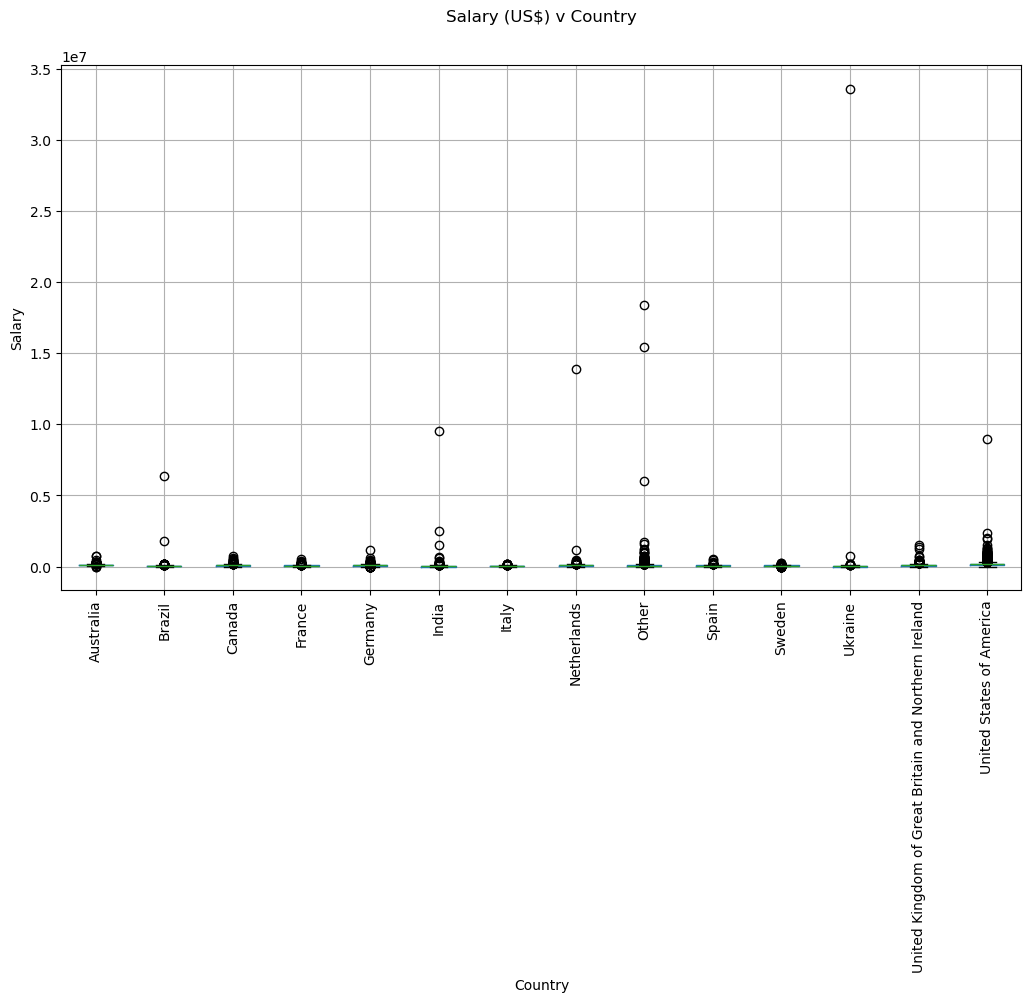

In [72]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [73]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

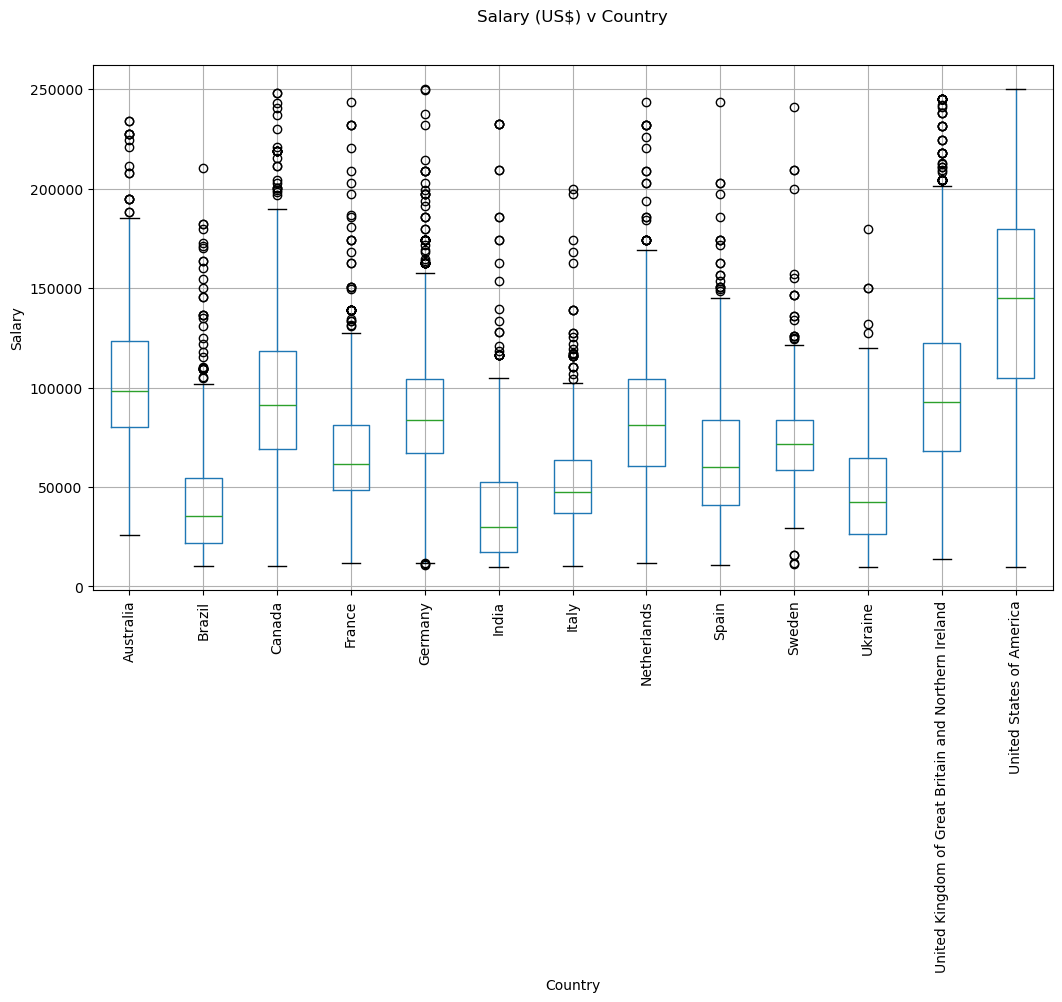

In [74]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12076 entries, 0 to 49010
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    12076 non-null  object 
 1   EdLevel    12065 non-null  object 
 2   YearsCode  12042 non-null  float64
 3   Salary     12076 non-null  float64
dtypes: float64(2), object(2)
memory usage: 471.7+ KB


In [76]:
df = df.rename(columns={"YearsCode": "YearsCodePro"})


In [77]:
df["YearsCodePro"].unique()

array([ 14.,  10.,   5.,  30.,  15.,   9.,  11.,  36.,  23.,  26.,  25.,
         8.,  38.,  35.,  21.,  19.,  18.,  13.,  20.,  41.,  12.,  16.,
        45.,  17.,  22.,  40.,  27.,   6.,   3.,  37.,   1.,  39.,  28.,
        33.,   7.,  24.,  29.,  50.,  44.,  31.,  46.,  43.,  52.,  42.,
         2.,  34.,  47.,  53.,  58.,   4.,  49.,  32.,  nan,  55.,  48.,
        60.,  59., 100.,  51.])

In [78]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [79]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Other (please specify):', nan],
      dtype=object)

In [80]:
df = df.dropna()


In [81]:
def clean_education(x):
    if isinstance(x, float) or pd.isna(x):
        return 'Less than a Bachelors'
    if 'Bachelor' in x:
        return 'Bachelor’s degree'
    if 'Master' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [82]:
df["EdLevel"].unique()

array(['Master’s degree', 'Less than a Bachelors', 'Bachelor’s degree',
       'Post grad'], dtype=object)

In [83]:
df['Country'].unique()

array(['Ukraine', 'Netherlands', 'United States of America', 'Sweden',
       'Germany', 'United Kingdom of Great Britain and Northern Ireland',
       'Spain', 'Canada', 'Brazil', 'Italy', 'India', 'France',
       'Australia'], dtype=object)

In [84]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([2, 1, 0, 3])

In [85]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([10,  7, 12,  9,  4, 11,  8,  2,  1,  6,  5,  3,  0])

In [86]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [87]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [88]:
y_pred = linear_reg.predict(X)

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [90]:
error

46357.31672840396

In [91]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [92]:
y_pred = dec_tree_reg.predict(X)

In [93]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,747.76


In [94]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [95]:
y_pred = random_forest_reg.predict(X)

In [96]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,898.19


In [97]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [98]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$37,883.36


In [99]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [100]:
X

,Country,EdLevel,YearsCodePro
0,10,2,14.0
1,7,1,10.0
3,10,0,5.0
7,10,3,30.0
8,10,0,15.0
...,...,...,...
49000,4,0,10.0
49002,11,0,11.0
49006,12,2,14.0
49008,7,0,10.0


In [101]:
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [102]:
print(le_country.classes_)
print(le_education.classes_)


['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Italy'
 'Netherlands' 'Spain' 'Sweden' 'Ukraine'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']
['Bachelor’s degree' 'Less than a Bachelors' 'Master’s degree' 'Post grad']


In [103]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[12.,  2., 15.]])

In [104]:
y_pred = regressor.predict(X)
y_pred

array([156196.80851064])

In [105]:
import pickle

In [106]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [107]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [108]:
y_pred = regressor_loaded.predict(X)
y_pred

array([156196.80851064])